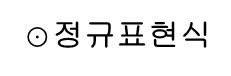 

In [2]:
import re
p=re.compile('[a-z]+')
a=p.match("1p2y3t4h5o6n7") # 처음부터 규칙 맞는지 검사

In [3]:
if a : print(a.group())

In [4]:
a=p.search("1p2y3t4h5o6n7") # 규칙 맞는지 검사
print(a.group()) # 기본적으로 처음 하나만 반환

p


In [5]:
a=p.findall("1p2y3t4h5o6n7") # 모든 규칙 맞는 부분 리스트 반환
print(a)


['p', 'y', 't', 'h', 'o', 'n']


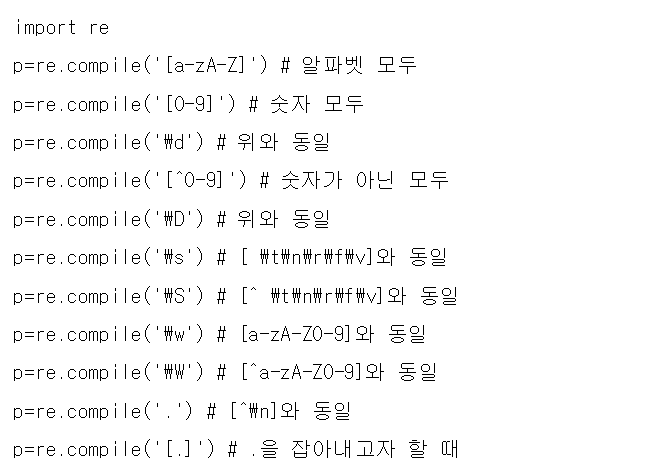

In [9]:
import re
p=re.compile('a.b')
a=p.search("anb");print(a.group())
p=re.compile('a.b',re.DOTALL)
a=p.search("a\nb");print(a.group())
p=re.compile('a.b',re.S)
a=p.search("a\nb");print(a.group())

anb
a
b
a
b


In [12]:
import re
p=re.compile('[a-z]+')
a=p.search("PYTHON");print(a.group()) # 대문자가 아니라서 오류

AttributeError: 'NoneType' object has no attribute 'group'

In [11]:
p=re.compile('[a-z]+',re.IGNORECASE)
a=p.search("PYTHON");print(a.group())
p=re.compile('[a-z]+',re.I)
a=p.search("PYTHON");print(a.group())

PYTHON
PYTHON


In [29]:
p = re.compile('Crow|Servo') # |는 or 효과를 가진 메타문자
#a=p.search('scarecrow');print(a.group())
a=p.search('vacuum Servo') ;print(a.group())
# 앞서 이야기 했던 ^ $ 는 각각 라인의 처음과 끝을 나타내는 메타문자
# 반면 \A \Z 는 각각 문자열 전체의 처음과 끝을 나타내는 메타문자
p = re.compile(r'\bclass\b') # \b는 여러 구분자를 나타내는 메타문자
a=p.search('no class today');print(a.group())
#a=p.search('declassified') ;print(a.group()) # \B 는 \b의 반대


Servo
class


In [32]:
import re
# 실제로 정규표현식을 사용하는 방법
p = re.compile("(\w+)\s+(\d+)[-](\d+)[-](\d+)")
m = p.search("park 010-1234-5678")
print(m.group(0));print(m.group(1))
print(m.group(2));print(m.group(3));print(m.group(4));

park 010-1234-5678
park
010
1234
5678


In [52]:
p = re.compile(r'(\s\w+)\1')
print(p.search('Paris in the the spring').group())

 the the


In [33]:
p = re.compile("(?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group("name"))

park


In [39]:
import re
# 긍정형 전방탐색 (?=)
p = re.compile("\w+(?=:)")
m = p.search("http://google.com")
print(m.group())

http


In [45]:
# 부정형 전방탐색 (?!)
p = re.compile("""[/]{2}([0-9a-zA-Z]+[.](?!com)[0-9a-zA-Z]*[.](?!com)[0-9a-zA-Z]*)""",re.X)
m = p.search("""http://google.com
             http://www.naver.com
             http://ssu.ac.kr
             https://www.youtube.com""")
print(m.group(1))
# 문자열 규칙이 복잡할 수록 정규표현식은 빛을 발휘

ssu.ac.kr


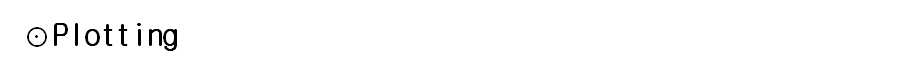

In [53]:
import matplotlib.pyplot as plt # 먼저 모듈을 불러오고
plt.xlim() # 등 메소드로 설정을 잡고 (안잡아도 됨 default도 충분)
# plt.plot(데이터), plt.scatter(데이터) 등 메소드로 그릴 그림을 입력
# 데이터나 다중 옵션 입력은 대부분 배열로!
# 배열은 import numpy.np 후 np.array(리스트) 로 생성
# 그 후 plt.show 로 그림 출력

(0.0, 1.0)

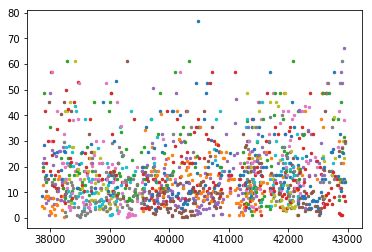

In [54]:
import re
import matplotlib.pyplot as plt

filer = open("D:/Python/20181025beacon_40f38590a161.txt","r")
filer.readline();lin=[]
p=re.compile('(\S*)\s*\S*\s*(\S*)\s*(\S*)')
str1=filer.readline()
while str1 :
    gg=p.match(str1)
    ti=eval(gg.group(3));me=eval(gg.group(2))
    if(gg.group(1) not in lin) : lin.append(gg.group(1))
    nn=lin.index(gg.group(1))
    plt.scatter(eval(gg.group(3)),eval(gg.group(2)),c='C'+str(nn),s=6)
    str1=filer.readline()
plt.show()
filer.close()


In [56]:
import math as m

def denstdnorm(x): return m.exp(-1*x*x/2)/m.sqrt(2*m.pi)
def simpnorm(x,sss,diff=0.00001) :
    end=0;w=0;area=0;f2=0;f3=0;pos=1
    f1=1/m.sqrt(2*m.pi)
    if sss.lower()=="left" : dir=-1
    elif sss.lower()=="right" : dir=1
    elif sss.lower()=="both" : dir=0
    else :
        print("2번째 인자에 left, right, both 중에 입력해 주세요.");return
    if x<0 : pos=-1.0
    elif (x==0)&(dir!=0) : return 0.5
    elif (x==0)&(dir==0) : return 0
    end=x*pos
    while(w<=end):
        f2=4*denstdnorm(w+diff/2)
        f3=denstdnorm(w+diff)
        area+=diff/6*(f1+f2+f3)
        f1=f3;w+=diff
    if pos*dir==1 : return 0.5-area
    elif pos*dir==-1 : return area+0.5
    else : return area*2



In [57]:
print(simpnorm(0,"left"))
print(simpnorm(0,"right"))
print(simpnorm(0,"both"))
print(simpnorm(1.645,"left"))
print(simpnorm(1.645,"right"))
print(simpnorm(1.96,"both"))
print(simpnorm(-1.645,"left"))
print(simpnorm(-1.645,"right"))
print(simpnorm(-1.96,"both"))
print(simpnorm(-1.96,"b"))


0.5
0.5
0
0.95001509446095
0.04998490553905005
0.9500042097034065
0.04998490553905005
0.95001509446095
0.9500042097034065
2번째 인자에 left, right, both 중에 입력해 주세요.
None


In [59]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

def plottttnorm(diff) :
    ax = plt.figure().add_subplot(1, 1, 1)
    start=-5.0;end=5.0;plt.xlim(start,end);plt.ylim(-0.01,0.5)
    w=start;f1=denstdnorm(w)
    while(w<=end):
        f2=denstdnorm(w+diff/2);f3=denstdnorm(w+diff)
        h=(f1+4*f2+f3)/6;f1=f3
        rect = plt.Rectangle((w,0),diff,h,color='b');ax.add_patch(rect);w+=diff
    x = np.linspace(start,end,(end-start)/(diff*2))
    plt.plot(x,mlab.normpdf(x,0,1),color='r')
    plt.title("diff : "+str(diff))
    plt.show()


C:\Users\15U560\Anaconda3\Scripts\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


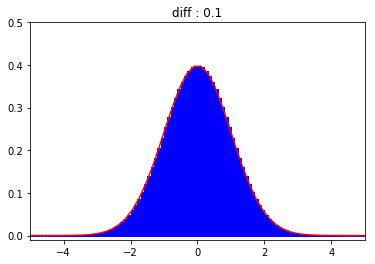

In [62]:
plottttnorm(0.1)

C:\Users\15U560\Anaconda3\Scripts\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


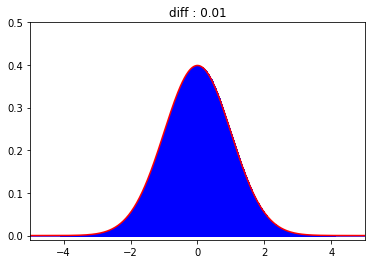

In [63]:
plottttnorm(0.01)

In [64]:
import numpy.random as ra
import numpy as np

n=50;x=ra.randint(1,50,n) # 1~49 중 정수 난수 50개 추출
one=np.repeat(1,n);xx=np.column_stack([x,one]);mx=sum(x)/n
y=ra.normal(3.5*x,6,n);my=sum(y)/n
bb=np.linalg.inv(np.transpose(xx).dot(xx)).dot(np.transpose(xx).dot(y))
print(bb)
ssxx=np.transpose(x-mx).dot(x-mx)
b1=np.transpose(x-mx).dot(y-my)/ssxx
b0=my-b1*mx
print([b1,b0])


[ 3.57637602 -1.98873746]
[3.576376017917807, -1.9887374591578038]


In [65]:
import math as m

sst=np.transpose(y-my).dot(y-my);print("SST 출력 : "+str(sst))
ssr=np.transpose(my-bb[1]-bb[0]*x).dot(my-bb[1]-bb[0]*x)
print("SSR 출력 : "+str(ssr))
sse=np.transpose(y-bb[1]-bb[0]*x).dot(y-bb[1]-bb[0]*x)
print("SSE 출력 : "+str(sse))
mse=sse/(n-2) # mse=s*s
t1=b1/m.sqrt(mse/ssxx)
f0=(ssr/1)/mse


SST 출력 : 135809.0571301877
SSR 출력 : 134715.57705234498
SSE 출력 : 1093.480077842596


In [66]:
from scipy.stats import f
from scipy.stats import t

print("t통계량 출력 : "+str(t1))
print("F통계량 : "+str(f0)+"\t t통계량 제곱 : "+str(t1*t1))
print("F검정 p-value : "+str(1-f.cdf(f0,dfn=n-2,dfd=1)))
print("기울기에 대한 t검정 p-value : "+str(1-2.0*(t.cdf(abs(t1),df=n-2)-0.5)))
print("sst 검증 : "+str(ssr+sse))
print("결정계수 출력 : "+str(round((ssr/sst)*1000000)/10000)+"%")


t통계량 출력 : 76.89960146335214
F통계량 : 5913.548705222386	 t통계량 제곱 : 5913.548705222391
F검정 p-value : 0.01032147323226007
기울기에 대한 t검정 p-value : 0.0
sst 검증 : 135809.05713018758
결정계수 출력 : 99.1948%


In [68]:
import statsmodels.api as sm
est = sm.OLS(y, xx).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5914.
Date:                Wed, 07 Nov 2018   Prob (F-statistic):           6.34e-52
Time:                        20:42:42   Log-Likelihood:                -148.07
No. Observations:                  50   AIC:                             300.1
Df Residuals:                      48   BIC:                             304.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.5764      0.047     76.900      0.0

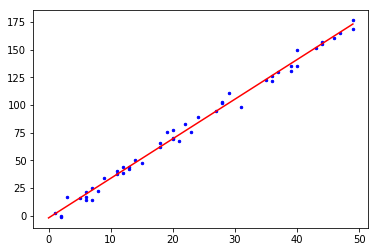

In [69]:
#plotting
import matplotlib.pyplot as plt
plt.scatter(x,y,c="b",s=6)
plt.plot([0,max(x)],[bb[1],bb[1]+bb[0]*max(x)],c='r')
plt.show()